In [2]:
import pandas as pd

df = pd.read_csv("../Nal3/university_rank_no_nan.csv", index_col=0, sep=",", decimal=".")
df.head()

,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Teaching,Research,Citations,Industry_Income,International_Outlook
University of Oxford,United Kingdom,20.664,11.2,95.4,1.0,41.000000,46.000000,54.0,90.5,99.6,98.4,65.5,excellent
California Institute of Technology,United States,2.240,6.4,94.5,2.0,30.000000,47.583088,66.0,92.1,97.2,97.9,88.0,excellent
University of Cambridge,United Kingdom,18.978,10.9,94.4,3.0,37.000000,47.000000,53.0,91.4,98.7,95.8,59.3,excellent
Stanford University,United States,16.135,7.3,94.3,4.0,11.086892,43.000000,57.0,92.8,96.4,99.9,66.2,excellent
Massachusetts Institute of Technology,United States,11.247,8.6,93.6,5.0,34.000000,39.000000,61.0,90.5,92.4,99.5,86.9,excellent


In [3]:
df.isnull().sum()

Country                      0
Number_students              0
Numb_students_per_Staff      0
Score_Result                 0
Rank                         0
International_Students(%)    0
Percentage_Female(%)         0
Percentage_Male(%)           0
Teaching                     0
Research                     0
Citations                    0
Industry_Income              0
International_Outlook        0
dtype: int64

In [4]:
df.dtypes

Country                       object
Number_students              float64
Numb_students_per_Staff      float64
Score_Result                 float64
Rank                         float64
International_Students(%)    float64
Percentage_Female(%)         float64
Percentage_Male(%)           float64
Teaching                     float64
Research                     float64
Citations                    float64
Industry_Income              float64
International_Outlook         object
dtype: object

In [5]:
import numpy as np

conditions = [
    df['Rank'] < 200,
    (df['Rank'] >= 200) & (df['Rank'] < 300),
    (df['Rank'] >= 300) & (df['Rank'] < 430),
    df['Rank'] >= 430
]

choices = ['prestigious', 'reputable', 'average', 'badReputation']

df['Status'] = np.select(conditions, choices, default=np.nan)

print(df.head(5))
df.isnull().sum()

                                              Country  Number_students  \
University of Oxford                   United Kingdom           20.664   
California Institute of Technology      United States            2.240   
University of Cambridge                United Kingdom           18.978   
Stanford University                     United States           16.135   
Massachusetts Institute of Technology   United States           11.247   

                                       Numb_students_per_Staff  Score_Result  \
University of Oxford                                      11.2          95.4   
California Institute of Technology                         6.4          94.5   
University of Cambridge                                   10.9          94.4   
Stanford University                                        7.3          94.3   
Massachusetts Institute of Technology                      8.6          93.6   

                                       Rank  International_Students(%)  \


Country                      0
Number_students              0
Numb_students_per_Staff      0
Score_Result                 0
Rank                         0
International_Students(%)    0
Percentage_Female(%)         0
Percentage_Male(%)           0
Teaching                     0
Research                     0
Citations                    0
Industry_Income              0
International_Outlook        0
Status                       0
dtype: int64

<Axes: xlabel='Status', ylabel='count'>

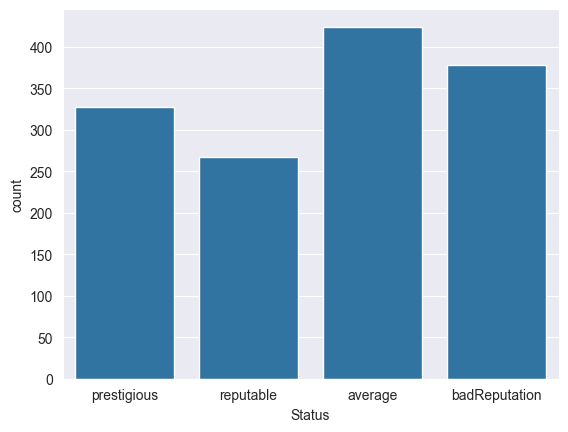

In [6]:
import seaborn as sns

sns.countplot(x='Status', data=df)

In [7]:
print(df.loc["University of Maribor"], "\n")
print(df.loc["University of Ljubljana"], "\n")

Country                      Slovenia
Number_students                12.124
Numb_students_per_Staff          13.6
Score_Result                     23.0
Rank                            418.0
International_Students(%)         5.0
Percentage_Female(%)             55.0
Percentage_Male(%)               45.0
Teaching                         17.0
Research                         15.8
Citations                        31.0
Industry_Income                  40.0
International_Outlook             bad
Status                        average
Name: University of Maribor, dtype: object 

Country                      Slovenia
Number_students                 40.11
Numb_students_per_Staff          14.7
Score_Result                     29.5
Rank                            356.0
International_Students(%)         6.0
Percentage_Female(%)             60.0
Percentage_Male(%)               40.0
Teaching                         21.1
Research                         18.7
Citations                        44.8
Indus

In [12]:
from sklearn.preprocessing import LabelEncoder

izhod = "Status"

df1 = df.copy(deep=True)
kat = df1.select_dtypes(include='object').columns.tolist()
kat.remove(izhod)


for k in kat:
    df1[k] = LabelEncoder().fit_transform(df1[k])
    
df1.head()

,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Teaching,Research,Citations,Industry_Income,International_Outlook,Status
University of Oxford,88,20.664,11.2,95.4,1.0,41.000000,46.000000,54.0,90.5,99.6,98.4,65.5,1,prestigious
California Institute of Technology,89,2.240,6.4,94.5,2.0,30.000000,47.583088,66.0,92.1,97.2,97.9,88.0,1,prestigious
University of Cambridge,88,18.978,10.9,94.4,3.0,37.000000,47.000000,53.0,91.4,98.7,95.8,59.3,1,prestigious
Stanford University,89,16.135,7.3,94.3,4.0,11.086892,43.000000,57.0,92.8,96.4,99.9,66.2,1,prestigious
Massachusetts Institute of Technology,89,11.247,8.6,93.6,5.0,34.000000,39.000000,61.0,90.5,92.4,99.5,86.9,1,prestigious


In [16]:
from sklearn.preprocessing import StandardScaler

ste = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
ste.remove("Rank")
ste.remove("Score_Result")

df1[ste] = StandardScaler().fit_transform(df1[ste])

df1.head()

['Number_students', 'Numb_students_per_Staff', 'Score_Result', 'Rank', 'International_Students(%)', 'Percentage_Female(%)', 'Percentage_Male(%)', 'Teaching', 'Research', 'Citations', 'Industry_Income']


,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Teaching,Research,Citations,Industry_Income,International_Outlook,Status
University of Oxford,88,-0.115104,-0.461506,95.4,1.0,2.625712,-0.100112,0.390898,4.402488,4.313494,1.813729,1.169357,1,prestigious
California Institute of Technology,89,-0.366056,-0.746721,94.5,2.0,1.660154,0.000000,1.145591,4.515607,4.176592,1.795695,2.552468,1,prestigious
University of Cambridge,88,-0.138069,-0.479332,94.4,3.0,2.274600,-0.036874,0.328007,4.466117,4.262156,1.719953,0.788233,1,prestigious
Stanford University,89,-0.176793,-0.693243,94.3,4.0,0.000000,-0.289827,0.579572,4.565096,4.130958,1.867831,1.212387,1,prestigious
Massachusetts Institute of Technology,89,-0.243372,-0.615997,93.6,5.0,2.011266,-0.542781,0.831136,4.402488,3.902788,1.853403,2.484849,1,prestigious


In [17]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df_izhod = df1[izhod]
df_vhod = df1.drop([izhod, "Rank", "Score_Result"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_vhod, df_izhod, test_size=0.25, random_state=789)
drevo_ena = RandomForestClassifier(n_estimators=50, random_state=789)
drevo_ena.fit(X_train, y_train)
rezultat = drevo_ena.predict(X_test)

print(metrics.accuracy_score(rezultat, y_test))

0.9226361031518625


In [22]:
df2_fake = df.copy(deep=True)
df2 = pd.get_dummies(df2_fake, columns=kat)

df_izhod = df2[izhod]
df_vhod = df2.drop([izhod, "Rank", "Score_Result"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_vhod, df_izhod, test_size=0.25, random_state=789)

scaler = StandardScaler()
X_train[ste] = scaler.fit_transform(X_train[ste])
X_test[ste] = scaler.transform(X_test[ste])

drevo_dva = RandomForestClassifier(n_estimators=50, random_state=789)
drevo_dva.fit(X_train, y_train)
rezultat = drevo_dva.predict(X_test)

print(metrics.accuracy_score(rezultat, y_test))

0.8767908309455588


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
    'n_estimators': randint(2, 1500),
    'max_depth': randint(2, 50),
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=params,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=789,
    verbose=1,
    n_jobs=-1  # Uporabi vse procesorje
)

random_search.fit(df_vhod, df_izhod)
print(f"Best params: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\vzupanic\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vzupanic\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vzupanic\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\vzupanic\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py", line

Best params: {'criterion': 'gini', 'max_depth': 44, 'max_features': 'sqrt', 'n_estimators': 257}
Best score: 0.8174628776241679
